In [2]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst Data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

## Customizing our chart from 12_Exercise

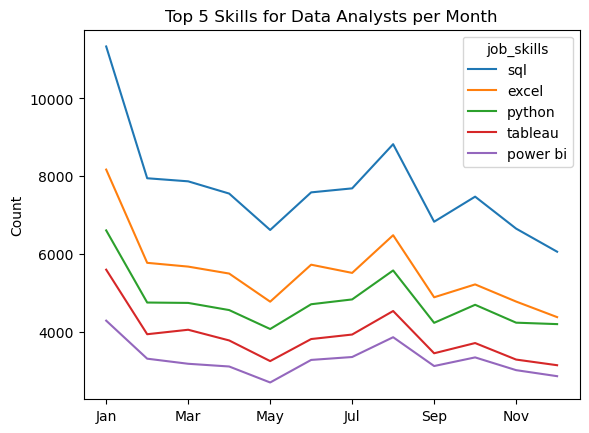

In [3]:
#Create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#Explode the job skills column and pivot 
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)

#sort the skill by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

#Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

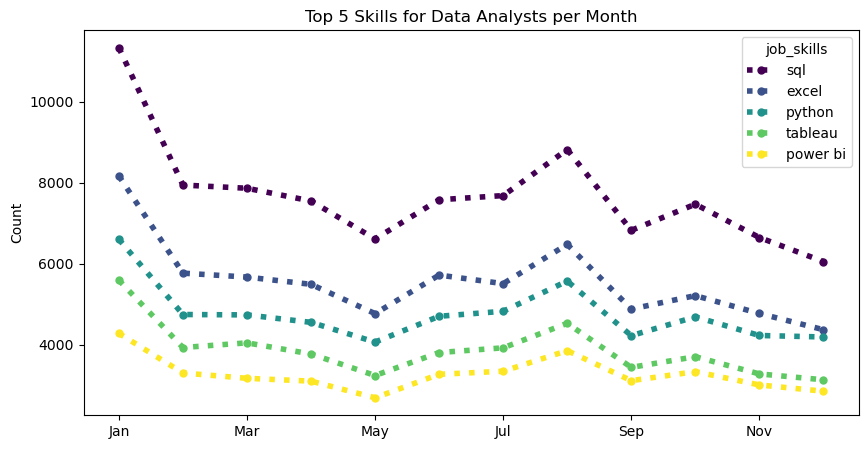

In [4]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth = 4,
    linestyle=':',# options:'--','-.'
    colormap='viridis',#options:'plasma','inferno'
    marker='o',
    markersize=5,
    figsize=(10,5)
    )
plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

## Customizing Our scatter plot from 15

In [9]:
#explode the job skill into individual rows
df_exploded = df_DA.explode('job_skills')

#Calculate the average salary and count of job posting per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg','median'),
    skills_count = ('job_skills','count')
)

#Limit to top skills
skills_count = 20
skills_stats = skill_stats.sort_values(by='skills_count',ascending=False).head(skill_count)

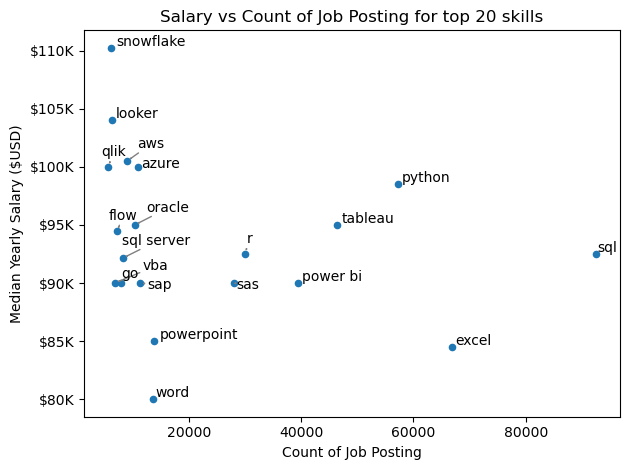

In [15]:
from adjustText import adjust_text

skills_stats.plot(kind='scatter',x='skills_count',y='median_salary')

texts = []
for i,txt in enumerate(skills_stats.index):
    texts.append(plt.text(skills_stats['skills_count'].iloc[i],skills_stats['median_salary'].iloc[i],txt))

adjust_text(texts,arrowprops=dict(arrowstyle='->',color='gray'))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

# set axis label,title,legend
plt.xlabel('Count of Job Posting')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title(f'Salary vs Count of Job Posting for top {skills_count} skills')

#adjust layout and display the plot
plt.tight_layout()
plt.show()